## 226 - Calculating a Brunt–Väisälä Frequency Profile

[Youtube](https://www.youtube.com/watch?v=PEGChXopCDk)

In [1]:
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [2]:
stations = ['OAK', 'GJT', 'TOP', 'ILN', 'MHX']
station_data = {}
date = datetime(2022, 3, 28, 12)

In [3]:
for station in stations:
    print(f'Getting {station}')
    df = pandas_dataframe_to_unit_arrays(WyomingUpperAir.request_data(date, station))
    df['theta'] = mpcalc.potential_temperature(df['pressure'], df['temperature'])
    df['bv_squared'] = mpcalc.brunt_vaisala_frequency_squared(df['height'], df['theta'])
    station_data[station] = df

Getting OAK
Getting GJT
Getting TOP
Getting ILN
Getting MHX


In [4]:
mean_bv = []

In [5]:
for station in stations:
    df = station_data[station]
    keep_idx = (df['height'] >= 1000 * units.m) & (df['height'] <= 5 * units.km)
    mean_bv.append(np.mean(df['bv_squared'][keep_idx]).m)

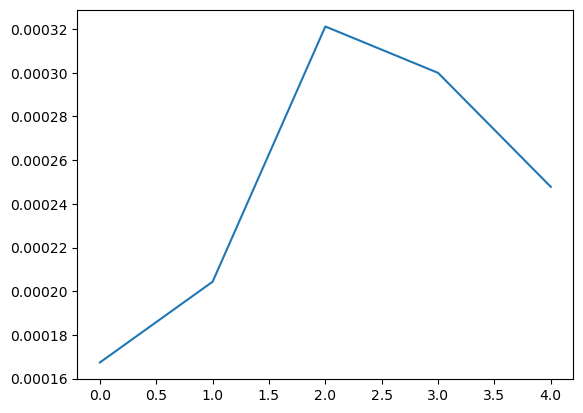

In [6]:
plt.plot(mean_bv)

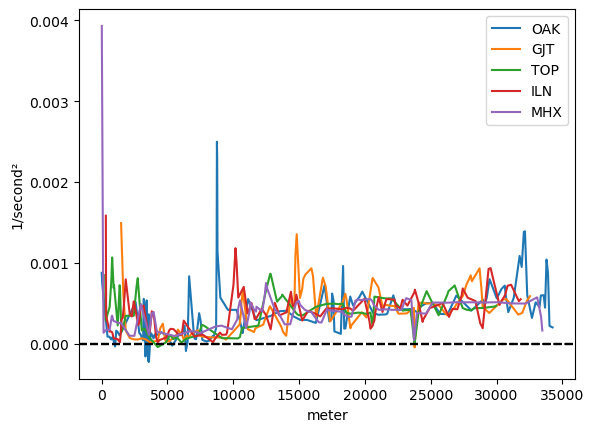

In [7]:
for station in stations:
    df = station_data[station]
    plt.plot(df['height'], df['bv_squared'], label = station)
    plt.axhline(y = 0, color = 'k', linestyle = '--')
    plt.legend()